In [64]:
import numpy as np
import pandas as pd

data = pd.read_csv("/Users/debapriyo/Dropbox/Teaching/CDS/BostonHousingData.csv")

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Moving Average
0,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0,NaN
1,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8,NaN
2,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0,NaN
3,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8,NaN
4,20.71620,0.0,18.10,0,0.659,4.138,100.0,1.1781,24,666,20.2,370.22,23.34,11.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2,NaN
502,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6,NaN
503,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1,NaN
504,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6,NaN


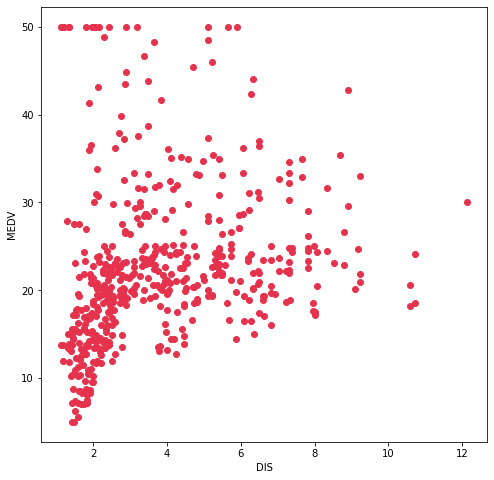

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(data['DIS'], data['MEDV'], color=[(0.9,0.2,0.3)])
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

In [ ]:
nOfBins = 20
N = len(data.index)

perm = np.random.permutation(N)

bins = [*range(0, N, int(N/nOfBins))]
if bins[-1] != N:
    bins.append(N)

print(bins)

print(perm[0:2])
print(data['DIS'].to_numpy()[perm[0:2]])
print(data['DIS'].to_numpy()[perm[0:2]])

In [ ]:
plt.figure(figsize=(8, 8))

midpoints = np.zeros((2,len(bins)-1))

for i in range(len(bins)-1):
    X = data['DIS'].to_numpy()[perm[bins[i]:bins[i+1]]]
    Y = data['MEDV'].to_numpy()[perm[bins[i]:bins[i+1]]]
    plt.scatter(X,Y, color=[(i/len(bins),1-i/len(bins),i/len(bins))], s=20)

               
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

In [67]:
# Sort an array based on some row

a = np.array([0,9,2,8,1])

print(a.argsort())

[0 4 2 3 1]


In [70]:
X = data['DIS'].to_numpy()
Y = data['MEDV'].to_numpy()

# Min and max of X and Y values
# print(np.min(X), np.max(X), np.min(Y), np.max(Y))

points_unsorted = np.array([X, Y])
# print(points.shape)

# Sort by X values (row with index 0)
points = points_unsorted[:, points_unsorted[0].argsort()]

#print(points)

[[ 1.1296  1.137   1.1691 ... 10.7103 10.7103 12.1265]
 [50.     13.8    50.     ... 18.6    24.1    30.1   ]]


In [85]:
#for i in range(0, 52, int(52/10)):
    #print(i)
#print(52)

b = [*range(0, 52, int(52/10))]
b.append(52)
print(b)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 52]


In [77]:
nOfBins = 20
N = len(data.index)

bins = [*range(0, N, int(N/nOfBins))]
if bins[-1] != N:
    bins.append(N)

print(bins)
# Alternatively, we can use np.arange()

[0, 26, 52, 78, 104, 130, 156, 182, 208, 234, 260, 286, 312, 338, 364, 390, 416, 442, 468, 494, 506]


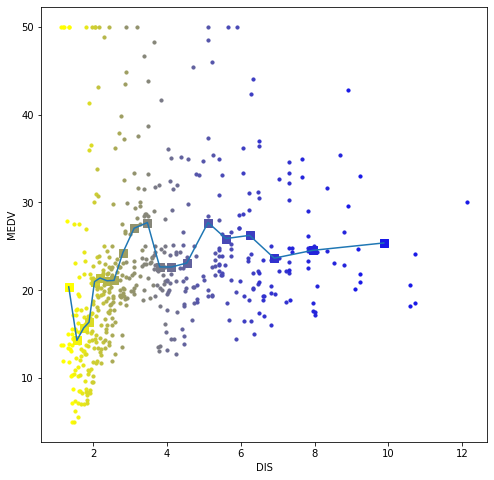

In [78]:
plt.figure(figsize=(8, 8))

midpoints = np.zeros((2,len(bins)-1))

for i in range(len(bins)-1):
    X = points[0,bins[i]:bins[i+1]]
    Y = points[1,bins[i]:bins[i+1]]
    plt.scatter(X,Y, color=[(1-i/len(bins),1-i/len(bins),i/len(bins))], s=10)
    midpoints[:,i] = np.array([np.mean(X), np.mean(Y)])
    plt.scatter(midpoints[0,i], midpoints[1,i], color=[(1-i/len(bins),1-i/len(bins),i/len(bins))], s=80, marker='s')
               
plt.xlabel('DIS')
plt.ylabel('MEDV')


plt.plot(midpoints[0,:],midpoints[1,:])

plt.show()